In [64]:
import pandas as pd

In [65]:
df = pd.read_csv(
    r"C:\potenup3\ai_team_6\data\processed\st_data_daily_merged.csv"
)
df

,Date,Yield_10Y,Gold_Price_YF,USD_Index,BTC_Price,Open_Interest
0,20250901,NaN,NaN,97.77,109243.3,75.0
1,20250902,42.77,3549.399902,98.40,111218.3,76.0
2,20250903,42.11,3593.199951,98.14,111716.5,77.0
3,20250904,41.76,3565.800049,98.35,110712.7,78.0
4,20250905,40.86,3613.199951,97.77,110652.2,79.0
...,...,...,...,...,...,...
57,20251028,39.83,3966.199951,98.67,112905.8,66.3
58,20251029,40.58,3983.699951,99.22,110024.6,66.2
59,20251030,40.93,4001.300049,99.53,108320.1,66.1
60,20251031,41.01,3982.199951,99.80,109602.8,66.0


In [52]:
import pandas as pd

# 역슬래시(\)를 모두 슬래시(/)로 바꿔서 입력합니다.
df = pd.read_csv("C:/potenup3/ai_team_6/data/processed/st_data_daily_merged.csv")

# 데이터 확인
df.head(20)

,Date,Yield_10Y,Gold_Price_YF,USD_Index,BTC_Price,Open_Interest
0,20250901,NaN,NaN,97.77,109243.3,75.00
1,20250902,42.77,3549.399902,98.40,111218.3,76.00
2,20250903,42.11,3593.199951,98.14,111716.5,77.00
3,20250904,41.76,3565.800049,98.35,110712.7,78.00
4,20250905,40.86,3613.199951,97.77,110652.2,79.00
5,20250906,NaN,NaN,NaN,110194.4,80.00
6,20250907,NaN,NaN,NaN,111150.1,81.00
7,20250908,40.46,3638.100098,97.45,112068.4,82.00
8,20250909,40.74,3643.300049,97.79,111516.5,83.00
9,20250910,40.32,3643.600098,97.78,113963.5,84.00


In [53]:
df.isnull().sum()

Date              0
Yield_10Y        18
Gold_Price_YF    18
USD_Index        17
BTC_Price         1
Open_Interest     1
dtype: int64

In [54]:
# 결측치 채우기 _ ffill (바로 앞의 값으로 채우기) 방식이 가장 적절

## 시장의 연속성: 경제 지표(금리, 달러 지수 등)는 주말에 시장이 쉼 // 하지만 세상의 경제 상황은 멈추지 않음
## 보통 시장이 쉬는 동안에는 "가장 최근에 거래된 가격(금요일 가격)"이 기준 ->> 월요일에 장이 열리기 전까지는 금요일 값을 그대로 쓰는 것이 가장 현실적
## 데이터가 없는 날 = 직전 영업일과 상태가 같았을 것 // 비트코인 : 시간 순서가 중요한 데이터이기에 !!

## 미래 데이터 오염 방지: 보간법(interpolate)은 '내일의 값'을 미리 알고 중간을 계산 // 하지만 실제 투자자들은 내일 가격이 어떨지 모른 채 오늘 결정을 내림
## 분석에서도 '미래의 정보'가 과거를 채우는 데 쓰이면 결과가 왜곡될 수 있는데, ffill은 오직 '과거의 정보'만 사용하므로 안전함

In [55]:
df2 = df.ffill() # f = Forward = 과거의 데이터를 가져와서 채운다
df2.head(20)

,Date,Yield_10Y,Gold_Price_YF,USD_Index,BTC_Price,Open_Interest
0,20250901,NaN,NaN,97.77,109243.3,75.00
1,20250902,42.77,3549.399902,98.40,111218.3,76.00
2,20250903,42.11,3593.199951,98.14,111716.5,77.00
3,20250904,41.76,3565.800049,98.35,110712.7,78.00
4,20250905,40.86,3613.199951,97.77,110652.2,79.00
5,20250906,40.86,3613.199951,97.77,110194.4,80.00
6,20250907,40.86,3613.199951,97.77,111150.1,81.00
7,20250908,40.46,3638.100098,97.45,112068.4,82.00
8,20250909,40.74,3643.300049,97.79,111516.5,83.00
9,20250910,40.32,3643.600098,97.78,113963.5,84.00


In [56]:
# 0열(맨 윗줄)의 결측치가 채워지지 않았기 때문에 , 뒤에 데이터로 채움
df3 = df2.bfill()
df3.head(20)

,Date,Yield_10Y,Gold_Price_YF,USD_Index,BTC_Price,Open_Interest
0,20250901,42.77,3549.399902,97.77,109243.3,75.00
1,20250902,42.77,3549.399902,98.40,111218.3,76.00
2,20250903,42.11,3593.199951,98.14,111716.5,77.00
3,20250904,41.76,3565.800049,98.35,110712.7,78.00
4,20250905,40.86,3613.199951,97.77,110652.2,79.00
5,20250906,40.86,3613.199951,97.77,110194.4,80.00
6,20250907,40.86,3613.199951,97.77,111150.1,81.00
7,20250908,40.46,3638.100098,97.45,112068.4,82.00
8,20250909,40.74,3643.300049,97.79,111516.5,83.00
9,20250910,40.32,3643.600098,97.78,113963.5,84.00


In [57]:
# 새롭게 저장하기 (결측치가 채워진 파일로)
df3.to_csv(
    "C:/potenup3/ai_team_6/data/processed/st_data_daily_merged_nan.csv",
    index = False
)

In [58]:
df_nan = pd.read_csv(
    "C:/potenup3/ai_team_6/data/processed/st_data_daily_merged_nan.csv"
)
df_nan.head(20)

,Date,Yield_10Y,Gold_Price_YF,USD_Index,BTC_Price,Open_Interest
0,20250901,42.77,3549.399902,97.77,109243.3,75.00
1,20250902,42.77,3549.399902,98.40,111218.3,76.00
2,20250903,42.11,3593.199951,98.14,111716.5,77.00
3,20250904,41.76,3565.800049,98.35,110712.7,78.00
4,20250905,40.86,3613.199951,97.77,110652.2,79.00
5,20250906,40.86,3613.199951,97.77,110194.4,80.00
6,20250907,40.86,3613.199951,97.77,111150.1,81.00
7,20250908,40.46,3638.100098,97.45,112068.4,82.00
8,20250909,40.74,3643.300049,97.79,111516.5,83.00
9,20250910,40.32,3643.600098,97.78,113963.5,84.00


In [59]:
df_mon = pd.read_csv(
    "C:/potenup3/ai_team_6/data/processed/st_data_monthly_merged.csv"
)
df_mon

,Date,M2_Supply,Inflation_Rate
0,20250901,22211.9,3.0
1,20251001,22297.8,2.8
2,20251101,22322.1,2.7


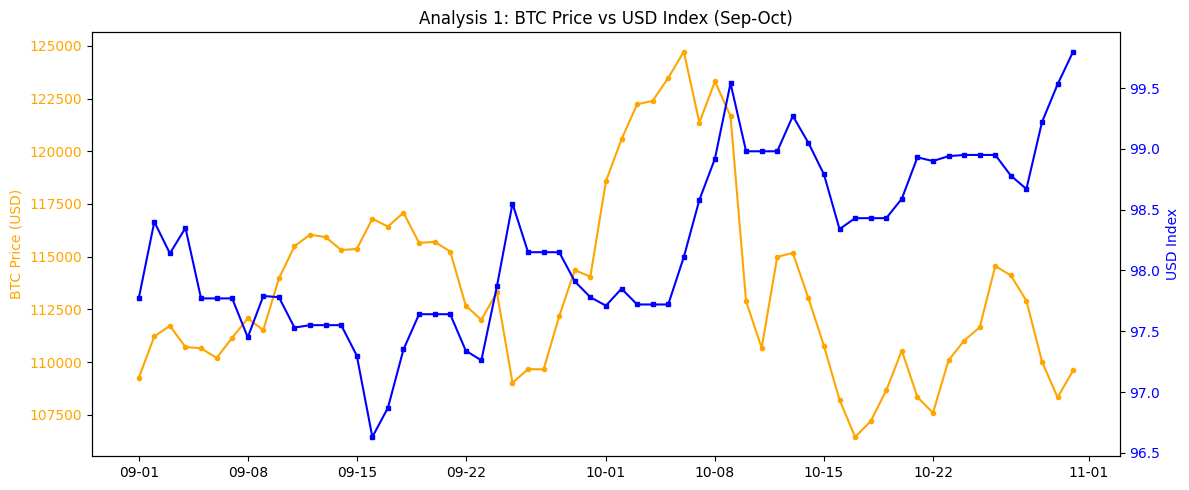

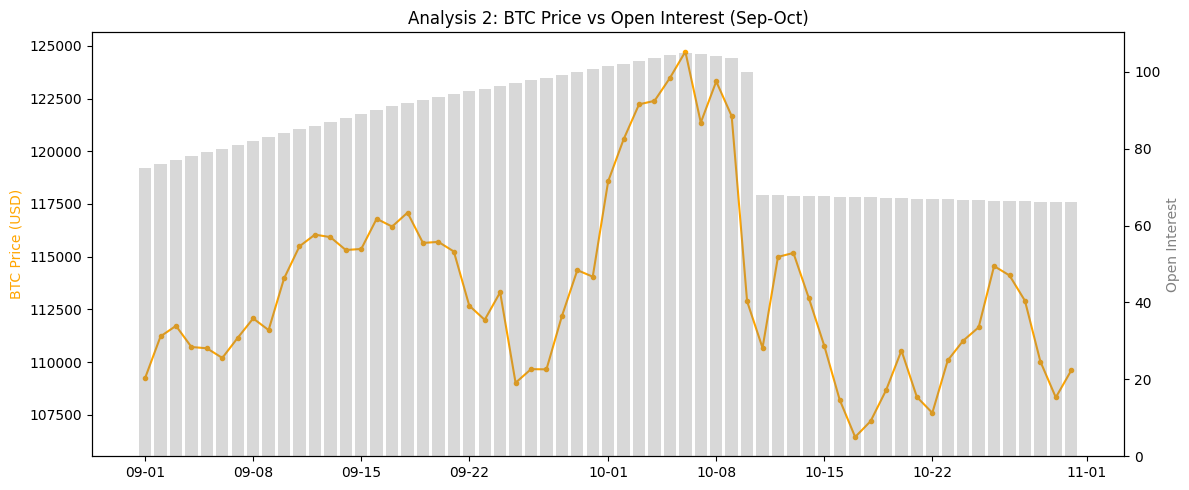

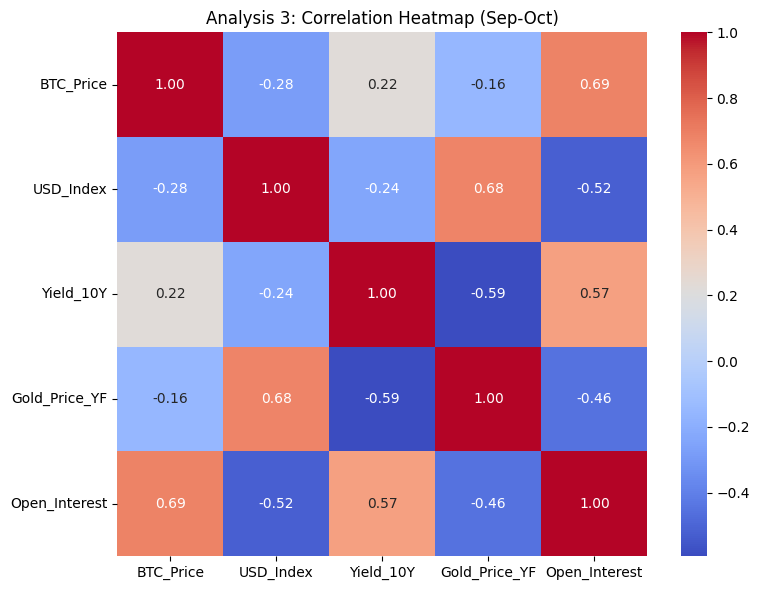

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 데이터 로드 (경로는 지현님 PC 환경에 맞춰 수정하세요)
df_nan = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_daily_merged_nan.csv")
df_mon = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_monthly_merged.csv")

# 날짜 형식 변환
df_nan['Date'] = pd.to_datetime(df_nan['Date'], format='%Y%m%d')
df_mon['Date'] = pd.to_datetime(df_mon['Date'], format='%Y%m%d')

# 분석 기간 필터링 (09-01 ~ 10-31)
mask = (df_nan['Date'] >= '2025-09-01') & (df_nan['Date'] <= '2025-10-31')
df_filtered = df_nan.loc[mask].copy()

# 시각화 설정 (x축에서 연도 제거하고 월-일만 표시)
def format_axis(ax):
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) # 연도 제외
    plt.xticks(rotation=45)

# [그래프 1] BTC 가격 vs 달러 지수
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(df_filtered['Date'], df_filtered['BTC_Price'], color='orange', marker='o', label='BTC', markersize=3)
ax1.set_ylabel('BTC Price (USD)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(df_filtered['Date'], df_filtered['USD_Index'], color='blue', marker='s', label='USD Index', markersize=3)
ax2.set_ylabel('USD Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Analysis 1: BTC Price vs USD Index (Sep-Oct)')
format_axis(ax1)
plt.tight_layout()
plt.show()

# [그래프 2] BTC 가격 vs 미결제약정
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(df_filtered['Date'], df_filtered['BTC_Price'], color='orange', marker='o', markersize=3)
ax1.set_ylabel('BTC Price (USD)', color='orange')

ax2 = ax1.twinx()
ax2.bar(df_filtered['Date'], df_filtered['Open_Interest'], color='gray', alpha=0.3)
ax2.set_ylabel('Open Interest', color='gray')

plt.title('Analysis 2: BTC Price vs Open Interest (Sep-Oct)')
format_axis(ax1)
plt.tight_layout()
plt.show()

# [그래프 3] 상관관계 히트맵
cols = ['BTC_Price', 'USD_Index', 'Yield_10Y', 'Gold_Price_YF', 'Open_Interest']
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtered[cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Analysis 3: Correlation Heatmap (Sep-Oct)')
plt.tight_layout()
plt.show()

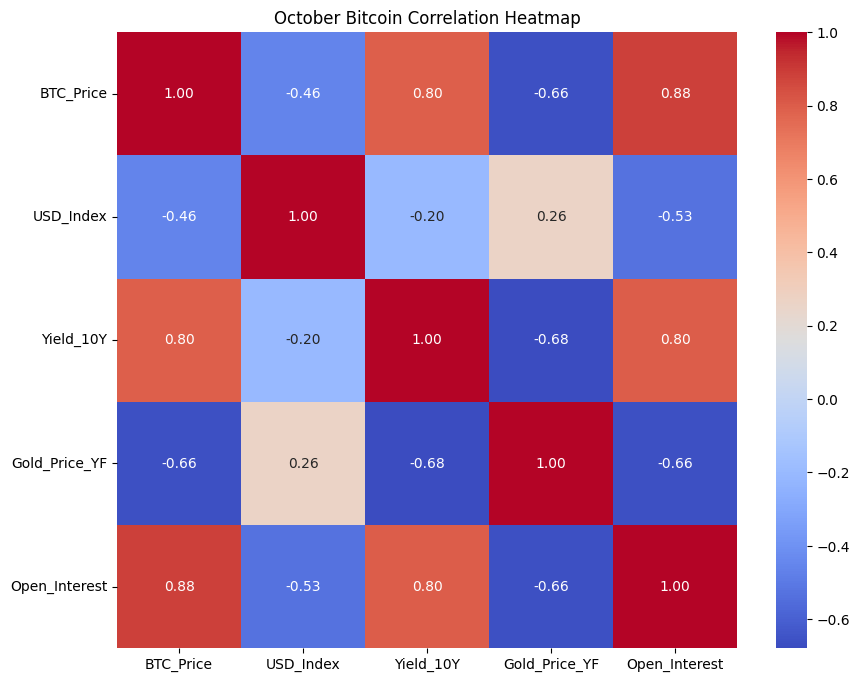

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 및 10월 필터링
df_nan = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_daily_merged_nan.csv")
df_nan['Date'] = pd.to_datetime(df_nan['Date'], format='%Y%m%d')
oct_df = df_nan[(df_nan['Date'] >= '2025-10-01') & (df_nan['Date'] <= '2025-10-31')]

# 상관계수 계산
cols = ['BTC_Price', 'USD_Index', 'Yield_10Y', 'Gold_Price_YF', 'Open_Interest']
corr_oct = oct_df[cols].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_oct, annot=True, cmap='coolwarm', fmt=".2f")

# x축 글자를 가로로 설정 (rotation=0)
plt.xticks(rotation=0) 
plt.yticks(rotation=0)

plt.title('October Bitcoin Correlation Heatmap')
plt.show()

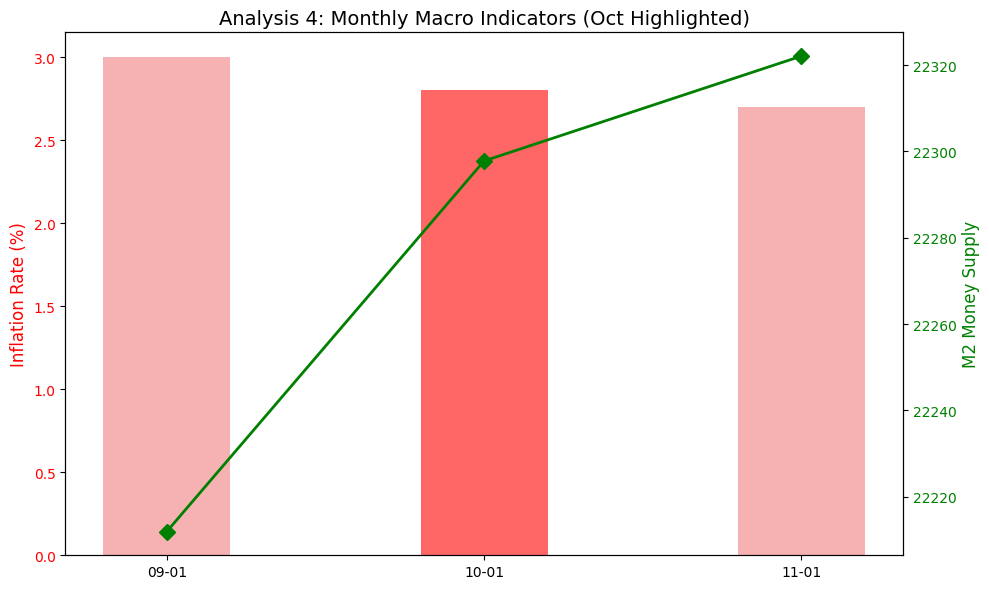

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 로드 및 전처리
# 월간 데이터 파일을 df_mon으로 불러옵니다.
df_mon = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_monthly_merged.csv")
df_nan = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_daily_merged_nan.csv") # 날짜 동기화를 위해 참조

# 날짜 형식 변환
df_mon['Date'] = pd.to_datetime(df_mon['Date'], format='%Y%m%d')

# 시각화 설정 (그래프 4: 월간 거시 지표 분석)
fig, ax1 = plt.subplots(figsize=(10, 6))

# x축 라벨을 '월-일' 형식으로 변환 (연도 제거)
mon_labels = df_mon['Date'].dt.strftime('%m-%d')

# 왼쪽 y축: 인플레이션율 (막대 그래프)
# 10월 데이터를 강조하기 위해 색상을 다르게 지정합니다.
colors = ['lightcoral', 'red', 'lightcoral'] # 9월, 10월, 11월 순서 (10월만 진하게)
bars = ax1.bar(mon_labels, df_mon['Inflation_Rate'], color=colors, alpha=0.6, label='Inflation Rate', width=0.4)
ax1.set_ylabel('Inflation Rate (%)', color='red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='red')

# 오른쪽 y축: M2 통화 공급량 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(mon_labels, df_mon['M2_Supply'], color='green', marker='D', markersize=8, label='M2 Supply', linewidth=2)
ax2.set_ylabel('M2 Money Supply', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# 타이틀 및 레이아웃 설정
plt.title('Analysis 4: Monthly Macro Indicators (Oct Highlighted)', fontsize=14)
fig.tight_layout()

# 그래프[4] 출력
plt.show()

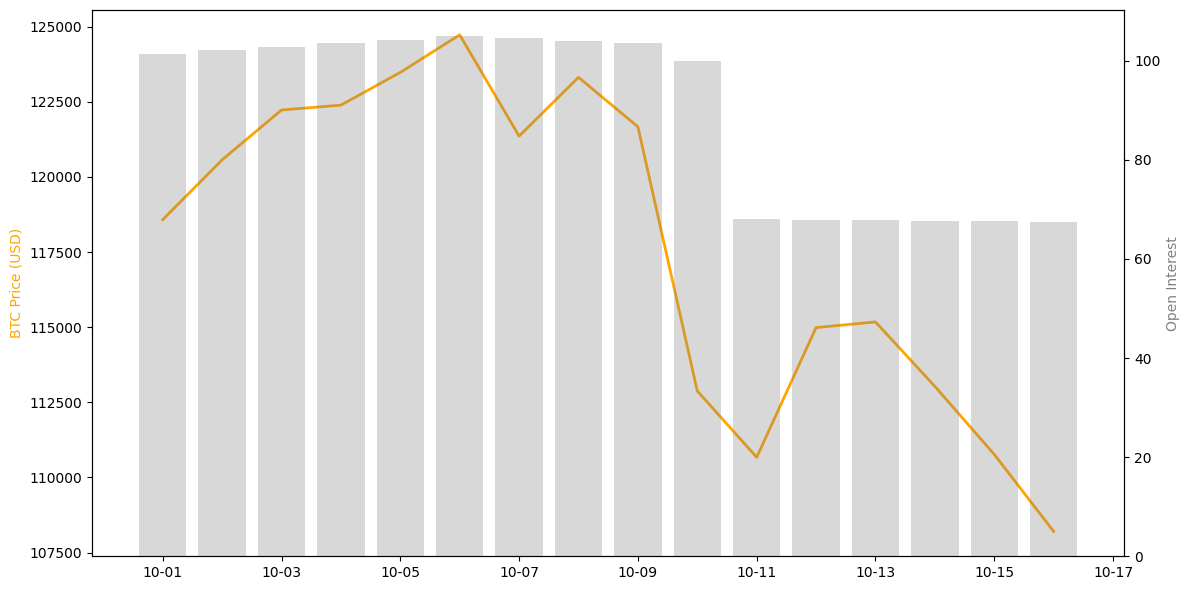

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 불러오기
df_nan = pd.read_csv(r"C:\potenup3\ai_team_6\data\processed\st_data_daily_merged_nan.csv")
df_nan['Date'] = pd.to_datetime(df_nan['Date'], format='%Y%m%d')

# 분석 기간 설정 (9월~10월 전체)
df_filtered = df_nan[(df_nan['Date'] >= '2025-10-01') & (df_nan['Date'] <= '2025-10-16')].copy()

fig, ax1 = plt.subplots(figsize=(12, 6))

# [왼쪽 Y축] 비트코인 가격 (오렌지색 선)
ax1.plot(df_filtered['Date'], df_filtered['BTC_Price'], color='orange', label='BTC Price', linewidth=2)
ax1.set_ylabel('BTC Price (USD)', color='orange')

# [오른쪽 Y축] 미결제약정 (회색 막대)
ax2 = ax1.twinx()
ax2.bar(df_filtered['Date'], df_filtered['Open_Interest'], color='gray', alpha=0.3, label='Open Interest')
ax2.set_ylabel('Open Interest', color='gray')

# X축 날짜 예쁘게 다듬기 (연도 제외)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()